# Import Libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter
import seaborn as sns

# Part 1 - I: Topological Network

## Constructing the Network

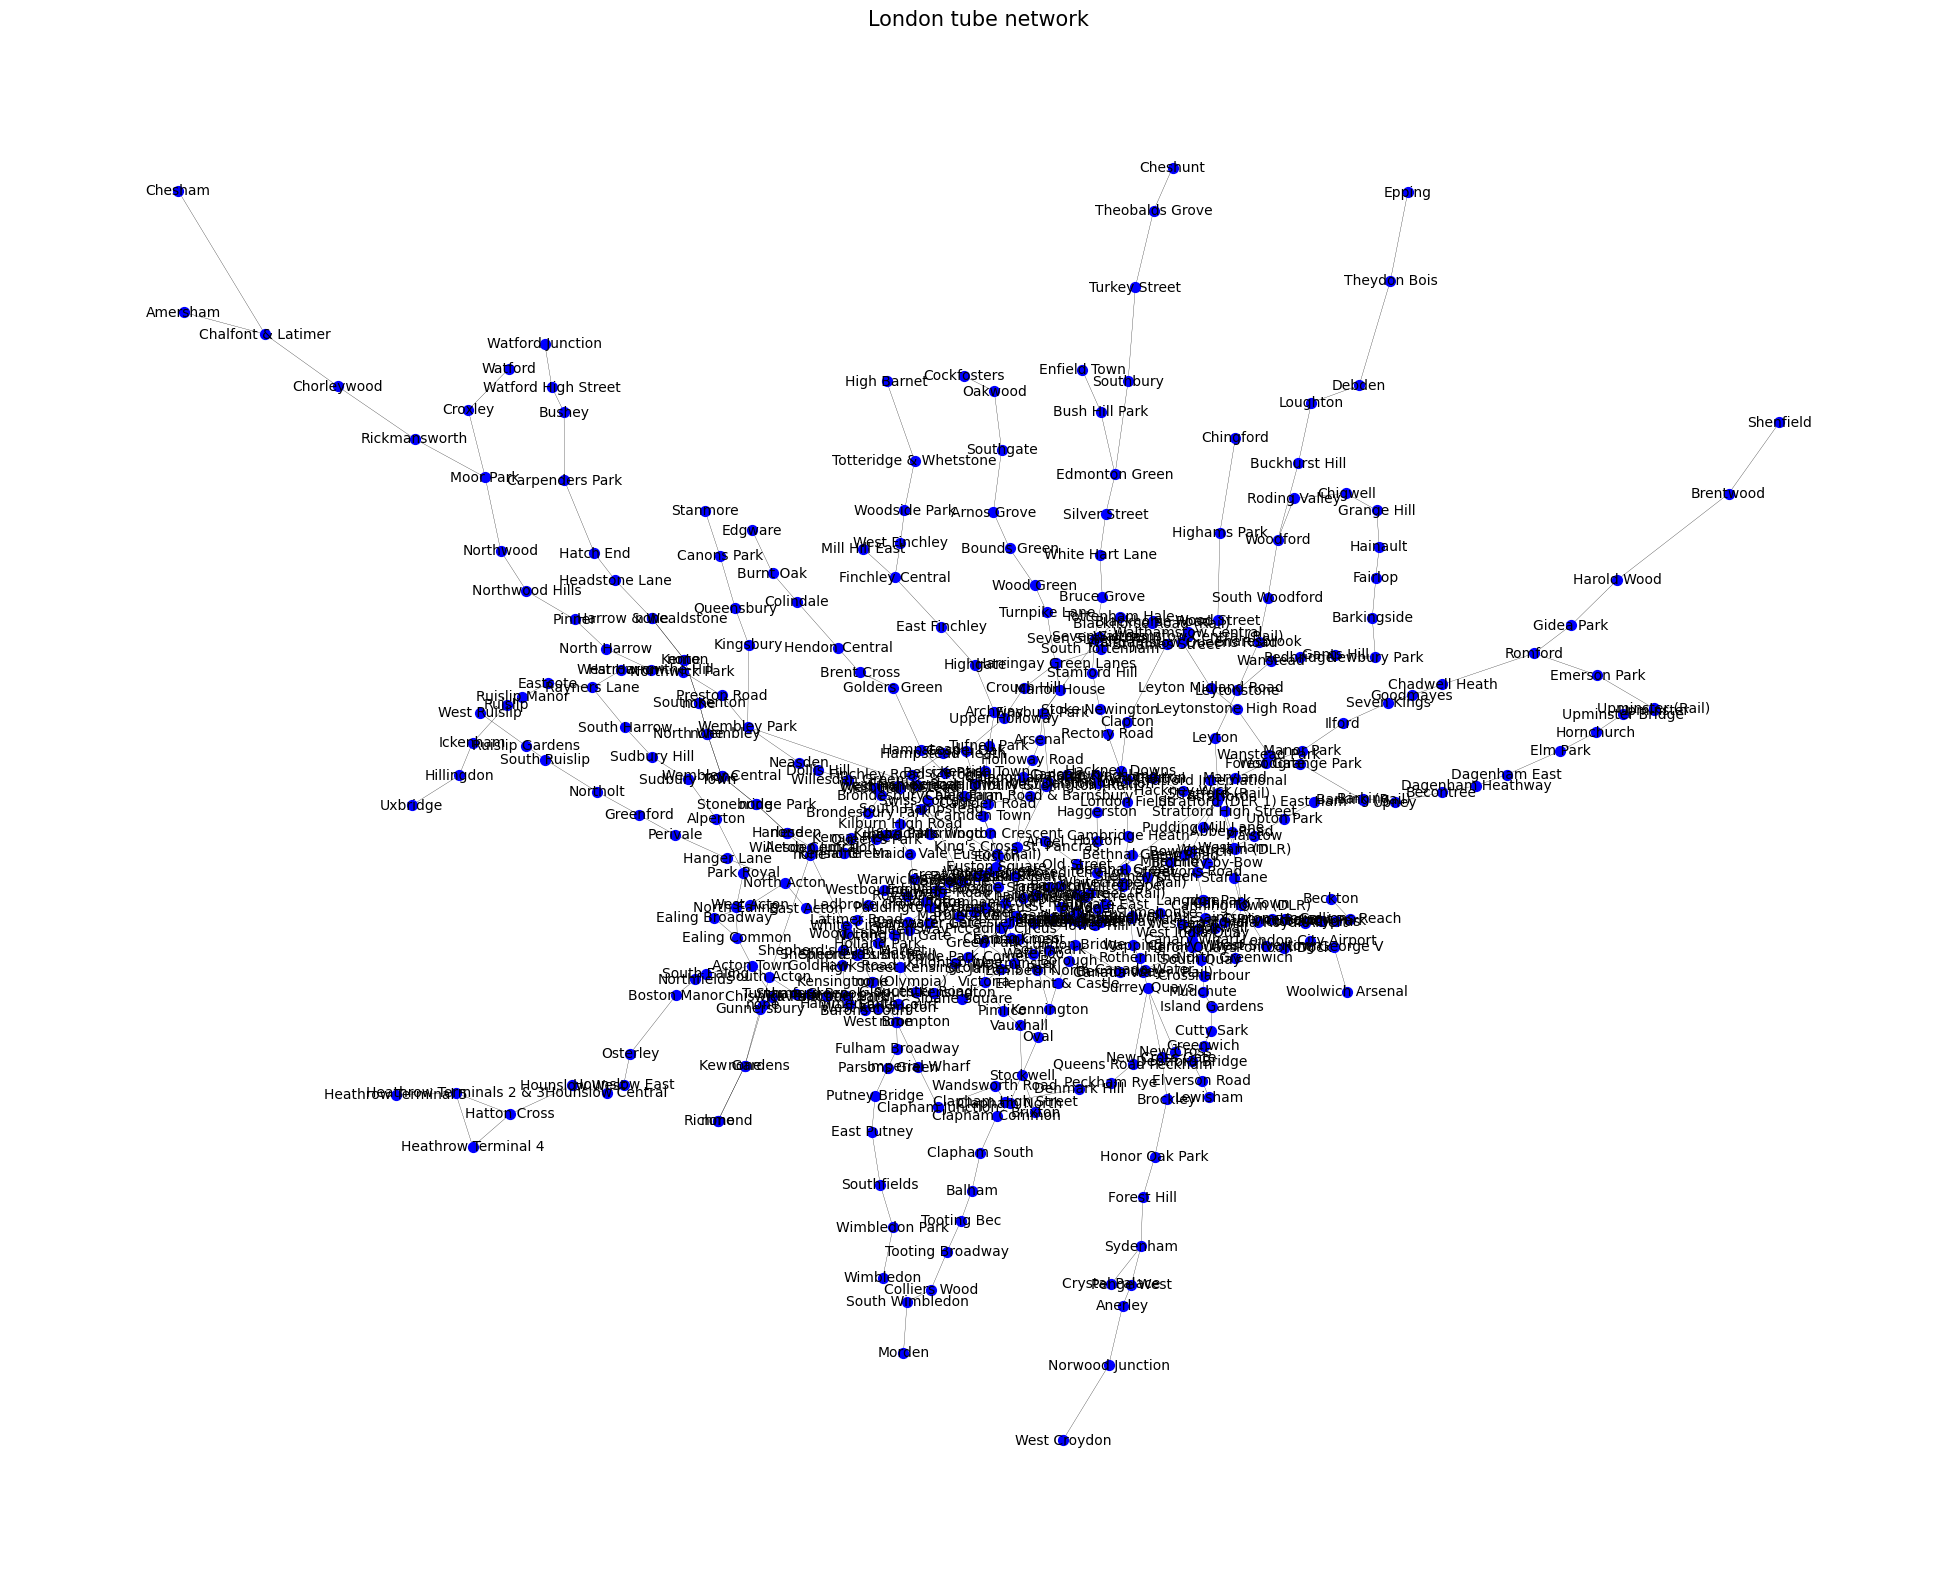

In [2]:
#OK, let us start with the graphml file for London's underground
G = nx.read_graphml('london_tubenetwork.graphml')
type(G)

#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])
    
# we can also add the stations name to the edge attributes from the nodes attributes:
nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')


# Plot the tube network! 
# Using the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [3]:
print(G.number_of_nodes())
print(G.number_of_edges())

438
486


In [4]:
# To check node attributes:
list(G.nodes(data = True))[0]

('910GCAMHTH',
 {'station_name': 'Cambridge Heath',
  'lines': 'London Overground',
  'coords': (534825.0140298002, 183290.813466997)})

In [5]:
# To check edges attributes:
list(G.edges(data = True))[0]

('910GCAMHTH',
 '910GBTHNLGR',
 {'length': 1076.0822006959384,
  'name': 'London Overground',
  'line_id': 'LeaValleyLine1',
  'station_1_': 'Cambridge Heath',
  'station_2_': 'Bethnal Green'})

In [6]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:20]

,source,target,station_2_,length,station_1_,line_id,name
0,910GCAMHTH,910GBTHNLGR,Bethnal Green,1076.082201,Cambridge Heath,LeaValleyLine1,London Overground
1,910GCAMHTH,910GLONFLDS,London Fields,970.949720,Cambridge Heath,LeaValleyLine2,London Overground
2,910GBTHNLGR,910GLIVST,Liverpool Street (Rail),1813.304143,Bethnal Green,LivStBeth,London Overground
3,910GBTHNLGR,940GZZLUBLG,Bethnal Green,481.514661,Bethnal Green,NaN,NaN
4,910GLONFLDS,910GHAKNYNM,Hackney Downs,917.502798,London Fields,LeaValleyLine3,London Overground
5,910GHAKNYNM,910GRCTRYRD,Rectory Road,1178.231752,Hackney Downs,LeaValleyLine4,London Overground
6,910GHAKNYNM,910GCLAPTON,Clapton,1432.298268,Hackney Downs,ChingfordSpur1,London Overground
7,910GRCTRYRD,910GSTKNWNG,Stoke Newington,775.442407,Rectory Road,LeaValleyLine5,London Overground
8,910GSTKNWNG,910GSTMFDHL,Stamford Hill,1200.722885,Stoke Newington,LeaValleyLine6,London Overground
9,910GSTMFDHL,910GSEVNSIS,Seven Sisters (Rail),1001.203674,Stamford Hill,LeaValleyLine7,London Overground


## I.1 - Centrality Measures

Here, three measures of centrality have been identified to characterise nodes:
- Degree Centrality
- Betweenness Centrality
- Closeness Centrality

### Degree Centrality

In [7]:
#  We can calculate the topological degree centrality using networkx function:
deg_london_t =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london_t),'degree')

# To dataframe using the nodes as the index
df_degree_t = pd.DataFrame(index=G.nodes())
df_degree_t['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df_degree_t['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_degree_t_sorted = df_degree_t.sort_values(["degree"], ascending=False)
df_degree_t_sorted[0:10]

,station_name,degree
940GZZLUKSX,King's Cross St. Pancras,0.016018
940GZZLUBST,Baker Street,0.016018
940GZZLUOXC,Oxford Circus,0.013730
940GZZLUGPK,Green Park,0.013730
940GZZLUBNK,Bank,0.013730
940GZZLUECT,Earl's Court,0.013730
940GZZLUWLO,Waterloo,0.013730
940GZZLUTNG,Turnham Green,0.011442
940GZZDLCGT,Canning Town (DLR),0.011442
940GZZLULVT,Liverpool Street,0.011442


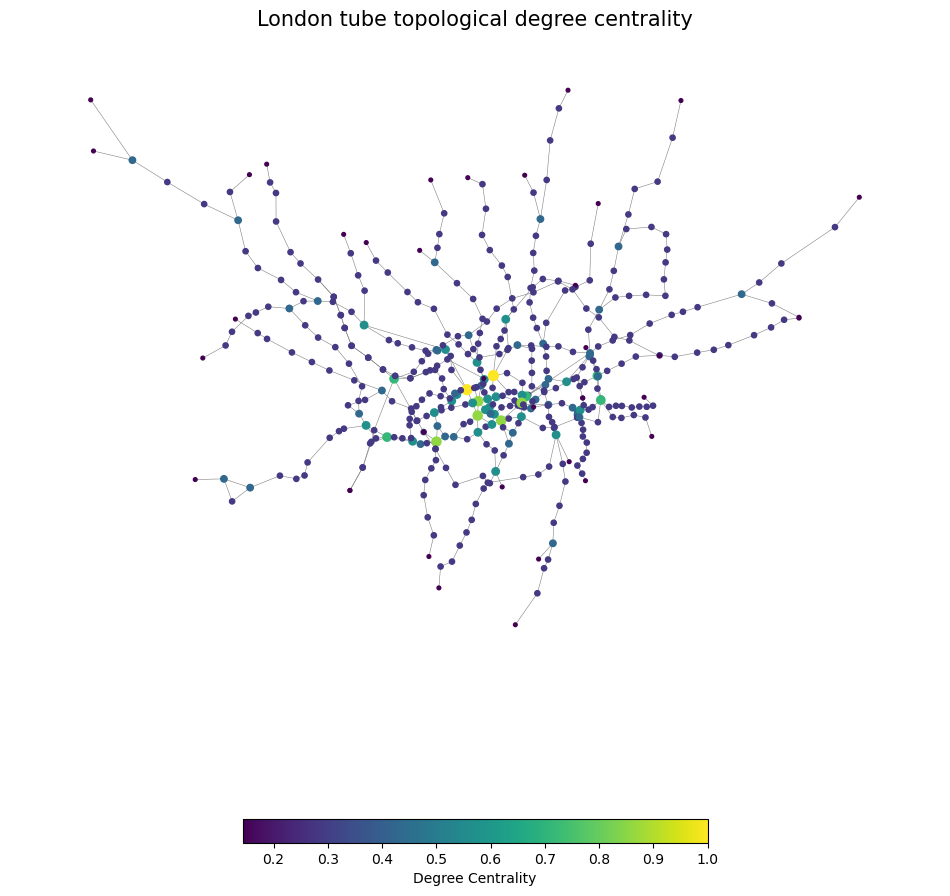

In [8]:
# Lets set colour and size of nodes according to betweenness values
degree_t_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_t_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_t_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological degree centrality",fontsize=15)
fig.savefig('output/topo_degree_centrality.png')
plt.show()

### Betweenness Centrality

In [9]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To a dataframe using the nodes as the index
df_betweenness_t = pd.DataFrame(index=G.nodes())
df_betweenness_t['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df_betweenness_t['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_betweenness_t_sorted = df_betweenness_t.sort_values(["betweenness_t"], ascending=False)
df_betweenness_t_sorted[0:10]

,station_name,betweenness_t
940GZZLUBST,Baker Street,36297.775794
940GZZLUBLG,Bethnal Green,33670.108333
940GZZLUFYR,Finchley Road,32064.800397
940GZZLUBNK,Bank,30443.441667
940GZZLUGPK,Green Park,30442.438095
940GZZLUWLO,Waterloo,30219.900000
940GZZLULVT,Liverpool Street,29820.741667
940GZZLUWSM,Westminster,27623.541667
940GZZLUBND,Bond Street,24635.653175
910GWHMDSTD,West Hampstead,22536.658333


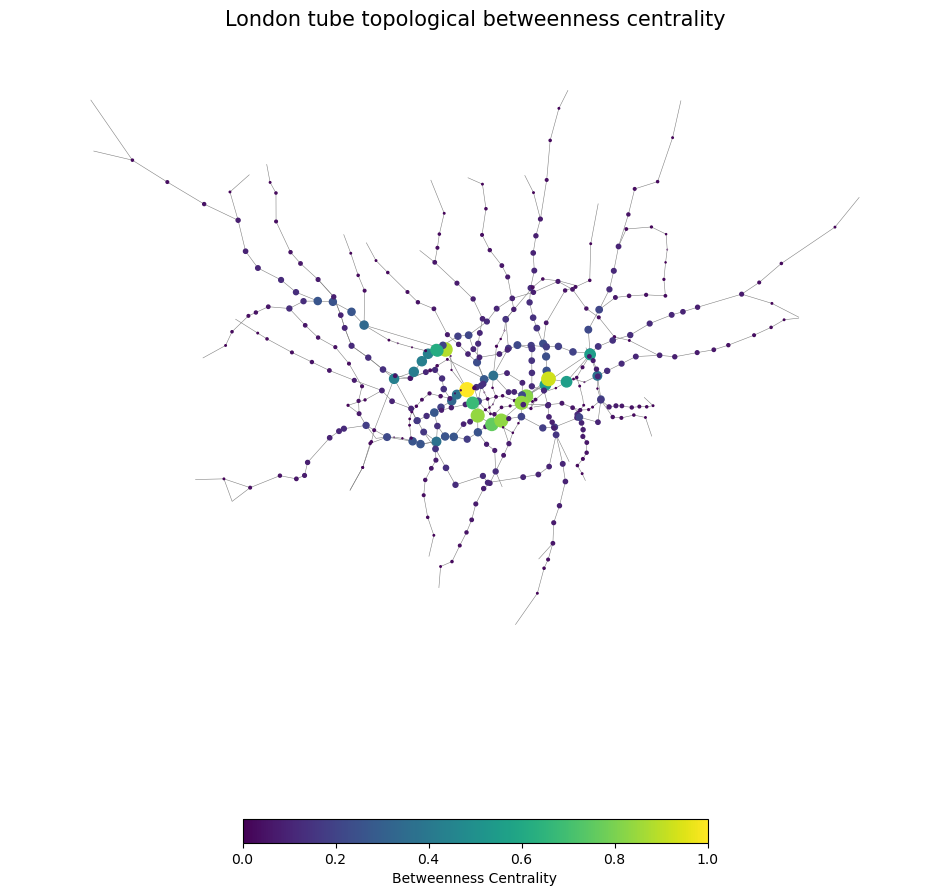

In [10]:
# Colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
fig.savefig('output/topo_betweenness_centrality.png')
plt.show()

### Closeness Centrality

In [11]:
#topological closeness centrality
clos_london_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_london_t,'closeness_t')

# To ataframe using the nodes as the index
df_closeness_t = pd.DataFrame(index=G.nodes())
df_closeness_t['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df_closeness_t['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_closeness_t_sorted = df_closeness_t.sort_values(["closeness_t"], ascending=False)
df_closeness_t_sorted[0:10]

,station_name,closeness_t
940GZZLUGPK,Green Park,0.094897
940GZZLUBND,Bond Street,0.093737
940GZZLUWSM,Westminster,0.093197
940GZZLUBST,Baker Street,0.092900
940GZZLUWLO,Waterloo,0.092389
940GZZLUBNK,Bank,0.092000
940GZZLUOXC,Oxford Circus,0.091614
940GZZLULVT,Liverpool Street,0.090010
940GZZLURGP,Regent's Park,0.089275
940GZZLUFYR,Finchley Road,0.089165


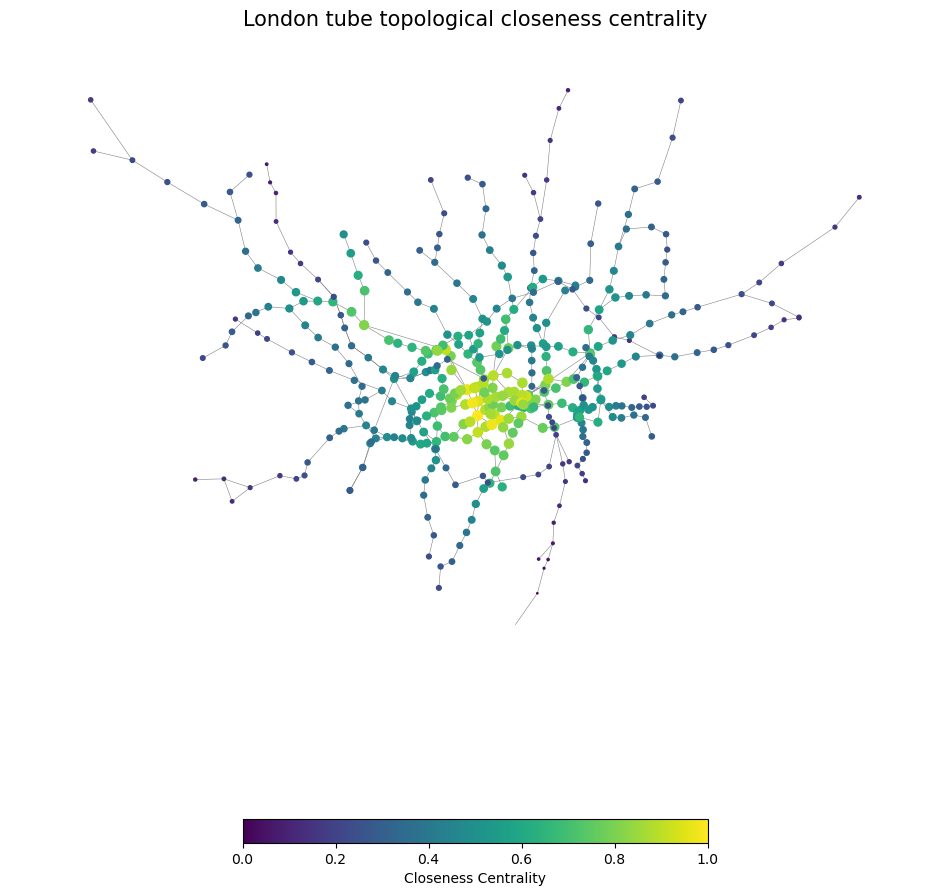

In [12]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
fig.savefig('output/topo_closeness_centrality.png')
plt.show()

## I.2 - Impact Measures

In [13]:
# Impact measures + number of nodes in network
l1 = len(list(G.nodes))
print(f"The number of existing nodes in the network with no removals is: {l1}")

diameter = nx.diameter(G)
print(f"The diameter of the network with no removals is: {diameter}")

avg_path_length = nx.average_shortest_path_length(G)
print(f"The average path length of the network with no removals is: {avg_path_length}")

global_efficiency = nx.global_efficiency(G)
print(f"The global efficiency of the network with no removals is: {global_efficiency}")

#net_robustness_index = nx.network_robustness_index(G)
print(f"The network robustness index with no removals is: 1")

clustering_coef = nx.average_clustering(G)
print(f"The clustering coefficient of the network with no removals is: {clustering_coef}")

The number of existing nodes in the network with no removals is: 438
The diameter of the network with no removals is: 47
The average path length of the network with no removals is: 17.272196273889012
The global efficiency of the network with no removals is: 0.08135196743399546
The network robustness index with no removals is: 1
The clustering coefficient of the network with no removals is: 0.022602739726027398


## I.3 - Node Removal

In [14]:
## OLD CODE - IGNORE ##

#def print_bold(text):
#    print("\033[1m" + text + "\033[0m")

In [15]:
## OLD CODE - IGNORE ##

#def remove_node_and_analyze_nonsequentially(G, node):
#    """Remove a node and analyze the graph."""
#    G.remove_node(node)  # Remove the node
#    
#    is_connected = nx.is_connected(G)
#    num_components = nx.number_connected_components(G)
#    components = list(nx.connected_components(G))
#    largest_component = max(components, key=len)
#    largest_subgraph = G.subgraph(largest_component)
#    
#    num_nodes = len(G.nodes)
#    num_nodes_largest = len(largest_subgraph.nodes)
#    diameter = nx.diameter(largest_subgraph)
#    avg_path_length = nx.average_shortest_path_length(largest_subgraph)
#    
#    print_bold(f"DETAILS OF GRAPH {i}:")
#    print(f"Node with maximum centrality: {node}")
#    print(f"The number of nodes in the network after removal is: {num_nodes}")
#    print(f"The graph is connected?: {is_connected}")
#    print(f"The graph has {num_components} components")
#    print(f"The sizes of each component are: {[len(G.subgraph(c).nodes()) for c in components]}")
#    print(f"IMPACT METRICS FOR GRAPH {i}:")
#    print(f"The number of existing nodes in the largest subgraph after removal is: {num_nodes_largest}")
#    print(f"The diameter of the network (largest subgraph) after removal is: {diameter}")
#    print(f"The average path length of the network (largest subgraph) after removal is: {avg_path_length}")

In [16]:
## OLD CODE - IGNORE ##

#def remove_node_and_analyze_sequentially_deg(G, iteration):
#    """Remove the highest centrality node and analyze the graph."""
#    degree_t_values = nx.degree_centrality(G)  # Recalculate degree centrality
#    sorted_nodes_by_degree = sorted(degree_t_values.items(), key=lambda item: item[1], reverse=True)
#    node, centrality = sorted_nodes_by_degree[0]  # Node with the highest centrality
#
#    G.remove_node(node)  # Remove the node
#    
#    # Check connectivity and prepare the largest subgraph if disconnected
#    if nx.is_connected(G):
#        largest_subgraph = G
#    else:
#        components = list(nx.connected_components(G))
#        largest_component = max(components, key=len)
#        largest_subgraph = G.subgraph(largest_component)
#
#    # Calculate metrics for the largest subgraph
#    num_nodes = len(G.nodes)
#    num_nodes_largest = len(largest_subgraph.nodes)
#    diameter = nx.diameter(largest_subgraph)
#    avg_path_length = nx.average_shortest_path_length(largest_subgraph)
#    
#    # Output results with formatting
#    print_bold(f"DETAILS OF GRAPH AFTER REMOVAL {iteration}:")
#    print(f"Node with maximum centrality removed: {node} with a centrality value of {centrality}")
#    print(f"The number of nodes in the network after removal is: {num_nodes}")
#    print(f"The graph is connected?: {nx.is_connected(G)}")
#    print(f"The graph has {len(components) if not nx.is_connected(G) else 1} components")
#    print(f"The sizes of each component are: {[len(G.subgraph(c).nodes()) for c in components] if not nx.is_connected(G) else [len(G.nodes())]}")
#    print(f"IMPACT METRICS FOR GRAPH AFTER REMOVAL {iteration}:")
#    print(f"The number of existing nodes in the largest subgraph after removal is: {num_nodes_largest}")
#    print(f"The diameter of the largest subgraph after removal is: {diameter}")
#    print(f"The average path length of the largest subgraph after removal is: {avg_path_length}")

In [17]:
## OLD CODE - IGNORE ##

#def remove_node_and_analyze_sequentially_bet(G, iteration):
#    """Remove the highest centrality node and analyze the graph."""
#    between_t_values = nx.betweenness_centrality(G)  # Recalculate degree centrality
#    sorted_nodes_by_between = sorted(between_t_values.items(), key=lambda item: item[1], reverse=True)
#    node, centrality = sorted_nodes_by_between[0]  # Node with the highest centrality
#
#    G.remove_node(node)  # Remove the node
#    
#    # Check connectivity and prepare the largest subgraph if disconnected
#    if nx.is_connected(G):
#        largest_subgraph = G
#    else:
#        components = list(nx.connected_components(G))
#        largest_component = max(components, key=len)
#        largest_subgraph = G.subgraph(largest_component)
#
#    # Calculate metrics for the largest subgraph
#    num_nodes = len(G.nodes)
#    num_nodes_largest = len(largest_subgraph.nodes)
#    diameter = nx.diameter(largest_subgraph)
#    avg_path_length = nx.average_shortest_path_length(largest_subgraph)
#    
#    # Output results with formatting
#    print_bold(f"DETAILS OF GRAPH AFTER REMOVAL {iteration}:")
#    print(f"Node with maximum centrality removed: {node} with a centrality value of {centrality}")
#    print(f"The number of nodes in the network after removal is: {num_nodes}")
#    print(f"The graph is connected?: {nx.is_connected(G)}")
#    print(f"The graph has {len(components) if not nx.is_connected(G) else 1} components")
#    print(f"The sizes of each component are: {[len(G.subgraph(c).nodes()) for c in components] if not nx.is_connected(G) else [len(G.nodes())]}")
#    print(f"IMPACT METRICS FOR GRAPH AFTER REMOVAL {iteration}:")
#    print(f"The number of existing nodes in the largest subgraph after removal is: {num_nodes_largest}")
#    print(f"The diameter of the largest subgraph after removal is: {diameter}")
#    print(f"The average path length of the largest subgraph after removal is: {avg_path_length}")

In [18]:
## OLD CODE - IGNORE ##

#def remove_node_and_analyze_sequentially_clos(G, iteration):
#    """Remove the highest centrality node and analyze the graph."""
#    close_t_values = nx.closeness_centrality(G)  # Recalculate degree centrality
#    sorted_nodes_by_close = sorted(close_t_values.items(), key=lambda item: item[1], reverse=True)
#    node, centrality = sorted_nodes_by_close[0]  # Node with the highest centrality
#
#    G.remove_node(node)  # Remove the node
#    
#    # Check connectivity and prepare the largest subgraph if disconnected
#    if nx.is_connected(G):
#        largest_subgraph = G
#    else:
#        components = list(nx.connected_components(G))
#        largest_component = max(components, key=len)
#        largest_subgraph = G.subgraph(largest_component)
#
#    # Calculate metrics for the largest subgraph
#    num_nodes = len(G.nodes)
#    num_nodes_largest = len(largest_subgraph.nodes)
#    diameter = nx.diameter(largest_subgraph)
#    avg_path_length = nx.average_shortest_path_length(largest_subgraph)
#    
#    # Output results with formatting
#    print_bold(f"DETAILS OF GRAPH AFTER REMOVAL {iteration}:")
#    print(f"Node with maximum centrality removed: {node} with a centrality value of {centrality}")
#    print(f"The number of nodes in the network after removal is: {num_nodes}")
#    print(f"The graph is connected?: {nx.is_connected(G)}")
#    print(f"The graph has {len(components) if not nx.is_connected(G) else 1} components")
#    print(f"The sizes of each component are: {[len(G.subgraph(c).nodes()) for c in components] if not nx.is_connected(G) else [len(G.nodes())]}")
#    print(f"IMPACT METRICS FOR GRAPH AFTER REMOVAL {iteration}:")
#    print(f"The number of existing nodes in the largest subgraph after removal is: {num_nodes_largest}")
#    print(f"The diameter of the largest subgraph after removal is: {diameter}")
#    print(f"The average path length of the largest subgraph after removal is: {avg_path_length}")

### Degree

#### Non-sequential Removal

In [19]:
## OLD CODE - IGNORE ##

# Non-sequential Removal of Nodes for Degree Centrality
#G_degree = nx.read_graphml('london_tubenetwork.graphml')  # Load your graph
#degree_t_values = nx.degree_centrality(G_degree)
#sorted_nodes_by_degree = sorted(deg_london_t.items(), key=lambda item: item[1], reverse=True)

# Remove top 10 nodes one by one
#for i in range(10):
#    node, centrality = sorted_nodes_by_degree[i]
#    remove_node_and_analyze_nonsequentially(G_degree, node)

#### Sequential Removal

In [20]:
## OLD CODE - IGNORE ##

# Sequential Removal of Nodes for Degree Centrality
#G_degree = nx.read_graphml('london_tubenetwork.graphml')  # Load your graph

# Remove top 10 nodes one by one and recompute centrality each time
#for i in range(1, 11):
#    remove_node_and_analyze_sequentially_deg(G_degree, i)

### Betweenness

#### Non-sequential Removal

In [21]:
## OLD CODE - IGNORE ##

# Non-sequential Removal of Nodes for Betweenness Centrality
#G_between = nx.read_graphml('london_tubenetwork.graphml')  # Load your graph
#bet_london_t = nx.betweenness_centrality(G_between, normalized=False)
#sorted_nodes_by_between = sorted(bet_london_t.items(), key=lambda item: item[1], reverse=True)

# Remove top 10 nodes one by one
#for i in range(10):
#    node, centrality = sorted_nodes_by_between[i]
#    remove_node_and_analyze_nonsequentially(G_between, node)

#### Sequential Removal

In [22]:
## OLD CODE - IGNORE ##

# Sequential Removal of Nodes for Degree Centrality
#G_between = nx.read_graphml('london_tubenetwork.graphml')  # Load your graph

# Remove top 10 nodes one by one and recompute centrality each time
#for i in range(1, 11):
#    remove_node_and_analyze_sequentially_bet(G_between, i)

### Closeness

#### Non-sequential Removal

In [23]:
## OLD CODE - IGNORE ##

#G_close = nx.read_graphml('london_tubenetwork.graphml')  # Load your graph
#clos_london_t = nx.closeness_centrality(G_close)
#sorted_nodes_by_between = sorted(clos_london_t.items(), key=lambda item: item[1], reverse=True)

# Remove top 10 nodes one by one
#for i in range(10):
#    node, centrality = sorted_nodes_by_between[i]
#    remove_node_and_analyze(G_close, node)

#### Sequential Removal

In [24]:
## OLD CODE - IGNORE ##

# Sequential Removal of Nodes for Degree Centrality
#G_close = nx.read_graphml('london_tubenetwork.graphml')  # Load your graph

# Remove top 10 nodes one by one and recompute centrality each time
#for i in range(1, 11):
#    remove_node_and_analyze_sequentially_clos(G_close, i)

### Performing All Removals and Tests in One Table

In [25]:
import pandas as pd
import networkx as nx

# Define a dictionary to store all metrics
results = {
    'removal': [],
    'type': [],
    'centrality_measure': [],
    'nodes_after_removal': [],
    'connected': [],
    'components': [],
    'largest_component_nodes': [],
    'diameter': [],
    'average_path_length': [],
    'global_efficiency' : [],
    'robustness_index' : [],
    'clustering_coefficient' : []
}

# Define functions

def global_efficiency(G):
    """Calculate global efficiency of the network."""
    return nx.global_efficiency(G)

def network_robustness_index(G):
    """Calculate the network robustness index based on the largest connected component."""
    if nx.is_connected(G):
        return 1.0  # The network is fully connected
    else:
        largest_component = max(nx.connected_components(G), key=len)
        return len(largest_component) / len(G.nodes())

def clustering_coefficient(G):
    """Calculate the average clustering coefficient of the network."""
    return nx.average_clustering(G)

def add_results(removal, type_, centrality_measure, G, largest_subgraph):
    """Add the results of the analysis to the results dictionary."""
    results['removal'].append(removal)
    results['type'].append(type_)
    results['centrality_measure'].append(centrality_measure)
    results['nodes_after_removal'].append(len(G.nodes))
    results['connected'].append(nx.is_connected(G))
    results['components'].append(nx.number_connected_components(G))
    results['largest_component_nodes'].append(len(largest_subgraph.nodes))
    results['diameter'].append(nx.diameter(largest_subgraph) if nx.is_connected(largest_subgraph) else float('inf'))
    results['average_path_length'].append(nx.average_shortest_path_length(largest_subgraph) if nx.is_connected(largest_subgraph) else float('inf'))
    results['global_efficiency'].append(global_efficiency(largest_subgraph))
    results['robustness_index'].append(network_robustness_index(G))
    results['clustering_coefficient'].append(clustering_coefficient(G))

def remove_node_and_analyze(G, node, removal, centrality_measure, sequential):
    """Remove a node and analyze the graph."""
    # Type of removal
    type_ = 'Seq' if sequential else 'Non-seq'
    
    # Remove the node from the graph
    G.remove_node(node)
    
    # Check connectivity and prepare the largest subgraph if disconnected
    if nx.is_connected(G):
        largest_subgraph = G
    else:
        components = list(nx.connected_components(G))
        largest_component = max(components, key=len)
        largest_subgraph = G.subgraph(largest_component)
    
    # Add results to the dictionary
    add_results(removal, type_, centrality_measure, G, largest_subgraph)

def analyze_network(G_original, centrality_func, sequential=False):
    """Analyze the network by removing nodes based on centrality measure."""
    centrality_measure = centrality_func.__name__.split('_')[0]  # Extract the centrality name
    G = G_original.copy()
    
    for i in range(10):
        # Calculate centrality values
        centrality_values = centrality_func(G)
        # Sort nodes by centrality
        sorted_nodes_by_centrality = sorted(centrality_values.items(), key=lambda item: item[1], reverse=True)
        # Remove the node with the highest centrality and analyze the graph
        node, centrality = sorted_nodes_by_centrality[0]
        remove_node_and_analyze(G, node, i, centrality_measure, sequential)
        # For sequential removal, recalculate centrality after each removal
        if sequential:
            centrality_func(G)

        remove_node_and_analyze(G, node, i, centrality_measure, sequential)

def analyze_network(G_original, centrality_func, sequential=False):
    """Analyze the network by removing nodes based on centrality measure."""
    centrality_measure = centrality_func.__name__.replace('_centrality', '') 
    G = G_original.copy()
    
    # Pre-calculate the centrality rankings for non-sequential removal
    sorted_nodes_by_centrality = []
    if not sequential:
        centrality_values = centrality_func(G)
        sorted_nodes_by_centrality = sorted(centrality_values.items(), key=lambda item: item[1], reverse=True)

    for i in range(10):
        if sequential:
            # Recalculate centrality rankings after each removal for sequential removal
            centrality_values = centrality_func(G)
            sorted_nodes_by_centrality = sorted(centrality_values.items(), key=lambda item: item[1], reverse=True)
        
        node, centrality = sorted_nodes_by_centrality[i if not sequential else 0]
        remove_node_and_analyze(G, node, i, centrality_measure, sequential)
        
# Load the graph
G = nx.read_graphml('london_tubenetwork.graphml')

# Analyze the network based on different centrality measures
analyze_network(G, nx.degree_centrality, sequential=False)
analyze_network(G, nx.betweenness_centrality, sequential=False)
analyze_network(G, nx.closeness_centrality, sequential=False)
analyze_network(G, nx.degree_centrality, sequential=True)
analyze_network(G, nx.betweenness_centrality, sequential=True)
analyze_network(G, nx.closeness_centrality, sequential=True)

# Convert the results dictionary to a Pandas DataFrame
results_df = pd.DataFrame(results)

# Now you can print the DataFrame, save it to a file, or perform additional analysis.
print(results_df)

    removal     type centrality_measure  nodes_after_removal  connected  \
0         0  Non-seq             degree                  437      False   
1         1  Non-seq             degree                  436      False   
2         2  Non-seq             degree                  435      False   
3         3  Non-seq             degree                  434      False   
4         4  Non-seq             degree                  433      False   
5         5  Non-seq             degree                  432      False   
6         6  Non-seq             degree                  431      False   
7         7  Non-seq             degree                  430      False   
8         8  Non-seq             degree                  429      False   
9         9  Non-seq             degree                  428      False   
10        0  Non-seq        betweenness                  437       True   
11        1  Non-seq        betweenness                  436       True   
12        2  Non-seq     

In [26]:
# To save the DataFrame to an Excel file
results_df.to_excel('output/network_analysis_newtocompare.xlsx')

In [27]:
results_df.head(60)

,removal,type,centrality_measure,nodes_after_removal,connected,components,largest_component_nodes,diameter,average_path_length,global_efficiency,robustness_index,clustering_coefficient
0,0,Non-seq,degree,437,False,2,420,47,17.511456,0.080721,0.961098,0.023036
1,1,Non-seq,degree,436,False,3,417,54,20.526759,0.072790,0.956422,0.023853
2,2,Non-seq,degree,435,False,3,416,54,20.800788,0.071539,0.956322,0.022912
3,3,Non-seq,degree,434,False,4,414,54,21.089366,0.070514,0.953917,0.024501
4,4,Non-seq,degree,433,False,6,404,55,21.925767,0.068884,0.933025,0.019630
5,5,Non-seq,degree,432,False,6,403,59,23.530178,0.064575,0.932870,0.018981
6,6,Non-seq,degree,431,False,6,402,59,24.058783,0.063177,0.932715,0.017633
7,7,Non-seq,degree,430,False,7,398,59,24.343721,0.062576,0.925581,0.014729
8,8,Non-seq,degree,429,False,8,392,61,24.796806,0.061786,0.913753,0.014763
9,9,Non-seq,degree,428,False,9,379,68,27.721880,0.057586,0.885514,0.014798


## Analysis

In [28]:
# Load the spreadsheet to see what sheets it contains
file_path = 'output/network_analysis_newtocompare.xlsx'
xls = pd.ExcelFile(file_path)
xls.sheet_names

['Sheet1']

In [29]:
# Load the data from 'Sheet1'
data = pd.read_excel(xls, 'Sheet1')
data.head()

,Unnamed: 0,removal,type,centrality_measure,nodes_after_removal,connected,components,largest_component_nodes,diameter,average_path_length,global_efficiency,robustness_index,clustering_coefficient
0,0,0,Non-seq,degree,437,False,2,420,47,17.511456,0.080721,0.961098,0.023036
1,1,1,Non-seq,degree,436,False,3,417,54,20.526759,0.072790,0.956422,0.023853
2,2,2,Non-seq,degree,435,False,3,416,54,20.800788,0.071539,0.956322,0.022912
3,3,3,Non-seq,degree,434,False,4,414,54,21.089366,0.070514,0.953917,0.024501
4,4,4,Non-seq,degree,433,False,6,404,55,21.925767,0.068884,0.933025,0.019630


In [30]:
# Analyzing how different centrality measures impact network characteristics
centrality_impact = data.groupby('centrality_measure').agg({
    'nodes_after_removal': 'mean',
    'connected': lambda x: sum(x)/len(x),
    'components': 'mean',
    'largest_component_nodes': 'mean',
    'diameter': 'mean',
    'average_path_length': 'mean',
    'global_efficiency': 'mean',
    'robustness_index': 'mean',
    'clustering_coefficient': 'mean'
}).reset_index()

centrality_impact

,centrality_measure,nodes_after_removal,connected,components,largest_component_nodes,diameter,average_path_length,global_efficiency,robustness_index,clustering_coefficient
0,betweenness,432.5,0.2,3.50,335.35,65.60,24.042306,0.078586,0.774373,0.020510
1,closeness,432.5,0.6,2.25,385.70,55.25,21.427148,0.073546,0.891034,0.021695
2,degree,432.5,0.0,5.90,399.85,56.80,22.612231,0.067522,0.924286,0.019182


In [31]:
# Analyzing the effectiveness of removal strategies (sequential vs non-sequential)
strategy_impact = data.groupby('type').agg({
    'nodes_after_removal': 'mean',
    'connected': lambda x: sum(x)/len(x),
    'components': 'mean',
    'largest_component_nodes': 'mean',
    'diameter': 'mean',
    'average_path_length': 'mean',
    'global_efficiency': 'mean',
    'robustness_index': 'mean',
    'clustering_coefficient': 'mean'
}).reset_index()

strategy_impact

,type,nodes_after_removal,connected,components,largest_component_nodes,diameter,average_path_length,global_efficiency,robustness_index,clustering_coefficient
0,Non-seq,432.5,0.300000,2.866667,418.466667,64.166667,24.643417,0.065760,0.967404,0.021041
1,Seq,432.5,0.233333,4.900000,328.800000,54.266667,20.744373,0.080676,0.759058,0.019883


In [32]:
# Replace non-numeric data with NaN
data_numeric = data.apply(pd.to_numeric, errors='coerce')

# Reviewing the impact measures in relation to robustness index and network fragmentation
impact_measures_correlation = data_numeric.corr()[['robustness_index', 'components', 'largest_component_nodes']].loc[
    ['diameter', 'average_path_length', 'global_efficiency', 'clustering_coefficient']
]

impact_measures_correlation

,robustness_index,components,largest_component_nodes
diameter,0.518200,-0.272378,0.508747
average_path_length,0.559674,-0.175615,0.546532
global_efficiency,-0.818762,0.296363,-0.809272
clustering_coefficient,0.395064,-0.786277,0.407635


In [33]:
data_numeric.corr()

,Unnamed: 0,removal,type,centrality_measure,nodes_after_removal,connected,components,largest_component_nodes,diameter,average_path_length,global_efficiency,robustness_index,clustering_coefficient
Unnamed: 0,1.000000,0.165854,NaN,NaN,-0.165854,0.115342,0.164431,-0.521109,-0.326555,-0.353017,0.452176,-0.523759,-0.107479
removal,0.165854,1.000000,NaN,NaN,-1.000000,-0.485499,0.635623,-0.482968,0.076628,0.187569,0.067934,-0.460906,-0.607290
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
centrality_measure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nodes_after_removal,-0.165854,-1.000000,NaN,NaN,1.000000,0.485499,-0.635623,0.482968,-0.076628,-0.187569,-0.067934,0.460906,0.607290
connected,0.115342,-0.485499,NaN,NaN,0.485499,1.000000,-0.576282,0.391517,-0.062644,-0.101225,-0.108564,0.381793,0.394724
components,0.164431,0.635623,NaN,NaN,-0.635623,-0.576282,1.000000,-0.581809,-0.272378,-0.175615,0.296363,-0.571833,-0.786277
largest_component_nodes,-0.521109,-0.482968,NaN,NaN,0.482968,0.391517,-0.581809,1.000000,0.508747,0.546532,-0.809272,0.999676,0.407635
diameter,-0.326555,0.076628,NaN,NaN,-0.076628,-0.062644,-0.272378,0.508747,1.000000,0.973389,-0.775250,0.518200,0.115406
average_path_length,-0.353017,0.187569,NaN,NaN,-0.187569,-0.101225,-0.175615,0.546532,0.973389,1.000000,-0.848285,0.559674,0.019533


In [34]:
correlation = data_numeric.corr()
correlation.drop(correlation.index[0], inplace=True)
correlation.drop(correlation.index[1], inplace=True)
correlation.drop(correlation.columns[0], axis=1, inplace=True)
correlation.drop(correlation.columns[2], axis=1, inplace=True)
correlation.drop(correlation.columns[1], axis=1, inplace=True)
correlation.drop(correlation.index[2], inplace=True)
correlation.drop(correlation.index[1], inplace=True)
correlation

,removal,nodes_after_removal,connected,components,largest_component_nodes,diameter,average_path_length,global_efficiency,robustness_index,clustering_coefficient
removal,1.000000,-1.000000,-0.485499,0.635623,-0.482968,0.076628,0.187569,0.067934,-0.460906,-0.607290
connected,-0.485499,0.485499,1.000000,-0.576282,0.391517,-0.062644,-0.101225,-0.108564,0.381793,0.394724
components,0.635623,-0.635623,-0.576282,1.000000,-0.581809,-0.272378,-0.175615,0.296363,-0.571833,-0.786277
largest_component_nodes,-0.482968,0.482968,0.391517,-0.581809,1.000000,0.508747,0.546532,-0.809272,0.999676,0.407635
diameter,0.076628,-0.076628,-0.062644,-0.272378,0.508747,1.000000,0.973389,-0.775250,0.518200,0.115406
average_path_length,0.187569,-0.187569,-0.101225,-0.175615,0.546532,0.973389,1.000000,-0.848285,0.559674,0.019533
global_efficiency,0.067934,-0.067934,-0.108564,0.296363,-0.809272,-0.775250,-0.848285,1.000000,-0.818762,-0.124785
robustness_index,-0.460906,0.460906,0.381793,-0.571833,0.999676,0.518200,0.559674,-0.818762,1.000000,0.395064
clustering_coefficient,-0.607290,0.607290,0.394724,-0.786277,0.407635,0.115406,0.019533,-0.124785,0.395064,1.000000


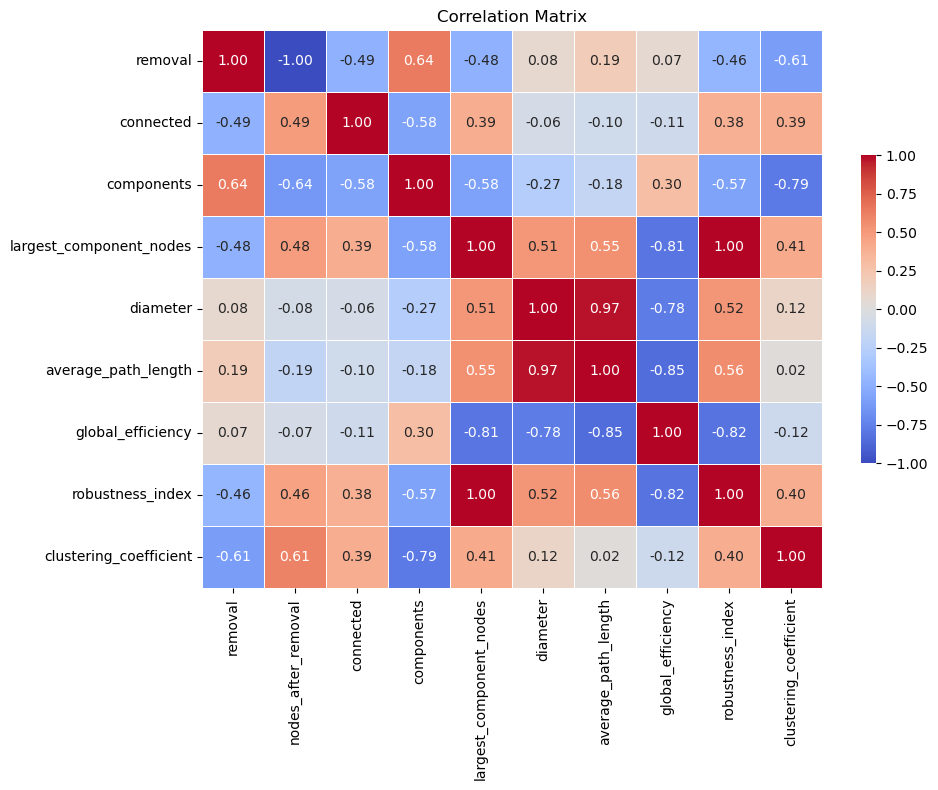

In [145]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix')
plt.savefig('output/network_correlation_matrix.png')
plt.show()

# III.2 - Selection of Spatial Interaction Model + Calibration

## Data Loading & Manipulation

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import scipy.stats
import numpy as np
from math import sqrt
import statsmodels.formula.api as smf

In [37]:
#set up the metric calculations
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [49]:
#read in the london flows, population, and jobs (and origin + destination) data
flows = pd.read_csv("london_flows.csv")
# replac distance of 0 with distance 0.01 to avoid log issues
flows['distance'] = flows['distance'].replace(0, 0.01)  # Replace zeros with a small positive value
flows['log_distance'] = np.log(flows['distance'])

flows['jobs'] = flows['jobs'].replace(0, 0.0001)  # Replace zeros with a small positive value
flows['population'] = flows['population'].replace(0, 0.0001)  # Replace zeros with a small positive value
flows['flows'] = flows['flows'].replace(0, 0.0001)  # Replace zeros with a small positive value

flows.head(20)

,station_origin,station_destination,flows,population,jobs,distance,log_distance
0,Abbey Road,Bank and Monument,0.0001,599.0,78549.0,8131.525097,9.003504
1,Abbey Road,Beckton,1.0000,599.0,442.0,8510.121774,9.049012
2,Abbey Road,Blackwall,3.0000,599.0,665.0,3775.448872,8.236275
3,Abbey Road,Canary Wharf,1.0000,599.0,58772.0,5086.514220,8.534348
4,Abbey Road,Canning Town,37.0000,599.0,15428.0,2228.923167,7.709274
5,Abbey Road,Crossharbour,1.0000,599.0,1208.0,6686.475560,8.807842
6,Abbey Road,Custom House,0.0001,599.0,845.0,3824.855630,8.249276
7,Abbey Road,Cutty Sark,2.0000,599.0,1748.0,8503.898909,9.048280
8,Abbey Road,Cyprus,7.0000,599.0,850.0,6532.099618,8.784484
9,Abbey Road,Devons Road,1.0000,599.0,611.0,3958.324171,8.283576


In [50]:
#show the actual flows between stations
flows_submat = pd.pivot_table(flows, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
#show the data
flows_submat

C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\2138072028.py:2: FutureWarning: The provided callable <function sum at 0x000002FCFE6BD8A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flows_submat = pd.pivot_table(flows, values ="flows", index="station_origin", columns = "station_destination",
C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\2138072028.py:2: FutureWarning: The provided callable <function sum at 0x000002FCFE6BD8A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flows_submat = pd.pivot_table(flows, values ="flows", index="station_origin", columns = "station_destination",
C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\2138072028.py:2: FutureWarning: The provided callable <function sum at 0x000002FCFE6BD8A0> is cu

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0000,5.990004e+02
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,NaN,NaN,1.224002e+03
Acton Town,NaN,NaN,NaN,3.0000,17.0000,NaN,35.0000,0.0001,NaN,11.000,...,77.0000,3.0000,6.0000,9.0000,NaN,0.0001,NaN,0.0001,NaN,3.745005e+03
Aldgate,NaN,NaN,0.0001,NaN,0.0001,NaN,NaN,0.0001,NaN,17.000,...,0.0001,NaN,4.0000,8.0000,NaN,0.0001,NaN,0.0001,NaN,2.886011e+03
Aldgate East,NaN,NaN,2.0000,0.0001,NaN,NaN,0.0001,0.0001,NaN,20.000,...,24.0000,0.0001,0.0001,12.0000,NaN,1.0000,NaN,1.0000,NaN,3.172009e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0000,5.0000,47.0000,NaN,NaN,NaN,NaN,22.000,...,2.0000,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,4.868002e+03
Woodgrange Park,NaN,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.300013e+02
Woodside Park,NaN,NaN,1.0000,26.0000,11.0000,NaN,0.0001,NaN,NaN,59.000,...,0.0001,NaN,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,3.093003e+03


## Creating the Model

In [139]:
#create the formula (the "-1" indicates no intercept in the regression model).
dbl_form = 'flows ~ station_destination + station_origin + log_distance-1'
#run a doubly constrained sim
doubSim = smf.glm(formula = dbl_form, data=flows, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(doubSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61474
Model:                            GLM   Df Residuals:                    60676
Model Family:                 Poisson   Df Model:                          797
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1831e+06
Date:                Tue, 23 Apr 2024   Deviance:                   2.1940e+06
Time:                        08:08:13   Pearson chi2:                 4.15e+06
No. Iterations:                    16   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [141]:
#get the estimates
flows["doubsimfitted"] = np.round(doubSim.mu)
#here's the matrix
flows_matrix = flows.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
flows_matrix

C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\1385880503.py:4: FutureWarning: The provided callable <function sum at 0x000002FCFE6BD8A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flows_matrix = flows.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\1385880503.py:4: FutureWarning: The provided callable <function sum at 0x000002FCFE6BD8A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flows_matrix = flows.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\1385880503.py:4: FutureWarning: The provided callable <function sum at 0x000002FCFE6BD8A

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,24.0,23.0,NaN,4.0,1.0,NaN,23.0,...,22.0,3.0,6.0,7.0,NaN,2.0,NaN,3.0,NaN,3752.0
Aldgate,NaN,NaN,5.0,NaN,22.0,NaN,NaN,1.0,NaN,19.0,...,14.0,NaN,5.0,4.0,NaN,2.0,NaN,2.0,NaN,2886.0
Aldgate East,NaN,NaN,5.0,25.0,NaN,NaN,2.0,1.0,NaN,21.0,...,15.0,2.0,5.0,4.0,NaN,2.0,NaN,2.0,NaN,3173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,9.0,33.0,33.0,NaN,NaN,NaN,NaN,31.0,...,27.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,4865.0
Woodgrange Park,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,6.0,21.0,20.0,NaN,3.0,NaN,NaN,21.0,...,18.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3087.0


In [142]:
#compared to:
flows_submat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0000,5.990004e+02
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,NaN,NaN,1.224002e+03
Acton Town,NaN,NaN,NaN,3.0000,17.0000,NaN,35.0000,0.0001,NaN,11.000,...,77.0000,3.0000,6.0000,9.0000,NaN,0.0001,NaN,0.0001,NaN,3.745005e+03
Aldgate,NaN,NaN,0.0001,NaN,0.0001,NaN,NaN,0.0001,NaN,17.000,...,0.0001,NaN,4.0000,8.0000,NaN,0.0001,NaN,0.0001,NaN,2.886011e+03
Aldgate East,NaN,NaN,2.0000,0.0001,NaN,NaN,0.0001,0.0001,NaN,20.000,...,24.0000,0.0001,0.0001,12.0000,NaN,1.0000,NaN,1.0000,NaN,3.172009e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0000,5.0000,47.0000,NaN,NaN,NaN,NaN,22.000,...,2.0000,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,4.868002e+03
Woodgrange Park,NaN,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.300013e+02
Woodside Park,NaN,NaN,1.0000,26.0000,11.0000,NaN,0.0001,NaN,NaN,59.000,...,0.0001,NaN,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,3.093003e+03


In [143]:
# test goodness of fit
rsq = CalcRSqaured(flows["flows"],flows["doubsimfitted"])
rmse = CalcRMSE(flows["flows"],flows["doubsimfitted"])
print(f"The R-square value is {rsq}")
print(f"The RMSE value is {rmse}")

The R-square value is 0.30993257426920995
The RMSE value is 109.597


## Tweaking the Model

### Distance Decay

Now, all of the way through these practicals, we have assumed that the distance decay parameter follows a negative power law. Well, it doesn't need to.

In [Wilson's original paper](http://journals.sagepub.com/doi/abs/10.1068/a030001) he generalised the distance decay parameter to:

\begin{equation} \tag{15}
f(d_{ij})
\end{equation}

Where $f$ represents some function of distance describing the rate at which the flow interactions change as distance increase. Lots of people have written about this, including [Talyor](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1538-4632.1971.tb00364.x) and more recently Robin Lovelace in a transport context, [here](https://www.slideshare.net/ITSLeeds/estimating-distance-decay-for-the-national-propensity-to-cycle-tool).

For the inverse power law that we have been using one pussible function of distance, the other common one that is used is the negative exponential function:

\begin{equation} \tag{16}
\exp (-\beta d_{ij})
\end{equation}

We can get a feel for how different distance decay parameters work by plotting some sample data (try different parameters):

---

With these parameters, the inverse power function has a far more rapid distance decay effect than the negative exponential function. In real life, what this means is that if the observed interactions drop off very rapidly with distance, then they might be more likely to follow an inverse power law. This might be the case when looking at trips to the local convenience store by walking, for example. On the other hand, if the effect of distance is less severe (for example migration across the country for a new job) then the negative exponential funtion might be more appropriate.

There is no hard and fast rule as to which function to pick, it will just come down to which fits the data better…

As [Taylor Oshan points out in his excellent Primer](http://openjournals.wu.ac.at/region/paper_175/175.html) what this means in our Poisson regression model is that we simply substitute $-\beta \ln d_{ij}$ for $-\beta d_{ij}$ in our model:

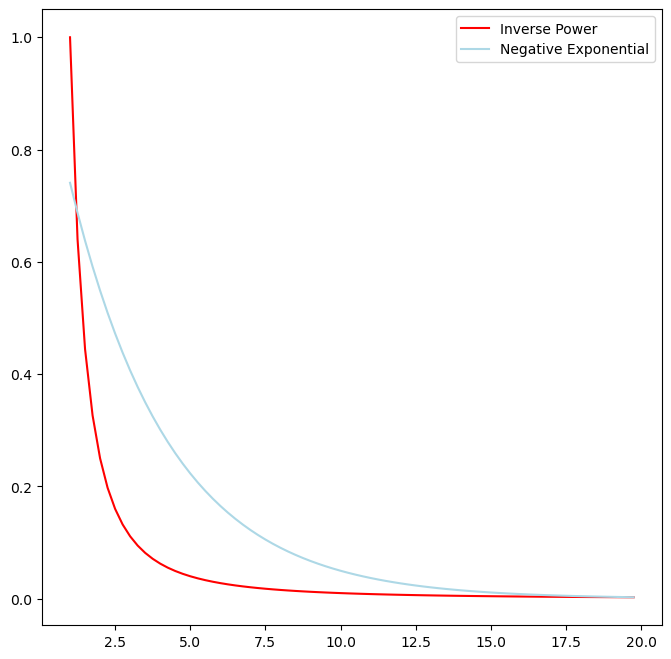

In [46]:
# Now let's consider some model tweaks.
# Starting with distance decay.
# Let's graph the distance decay parameters to get a feel for how they work.
xs = np.arange(1.0,20.0,0.25)
# inverse square power
y_inv_power = np.power(xs,-2)
# negative exponential, beta = 0.3
y_neg_exp_point3 = np.exp(-0.3*xs)

# Now a plot.
f, ax = plt.subplots(figsize=(8,8))
ax.plot(xs,y_inv_power, label = "Inverse Power", color = "red")
ax.plot(xs,y_neg_exp_point3, label = 'Negative Exponential', color = "lightblue")
ax.legend();

In [51]:
flows.describe()

,flows,population,jobs,distance,log_distance
count,61474.000000,61474.000000,61474.000000,61474.000000,61474.000000
mean,25.090164,5532.198312,6136.424798,16314.843329,9.483619
std,131.416756,8509.601663,10916.883647,9401.466901,0.770867
min,0.000100,0.000100,0.000100,0.010000,-4.605170
25%,0.000100,1554.000000,792.000000,8939.809178,9.098270
50%,3.000000,2839.000000,1921.000000,15232.813073,9.631207
75%,13.000000,5389.000000,6295.000000,22283.826198,10.011616
max,15946.000000,67372.000000,78549.000000,60633.323742,11.012600


In [52]:
# Run a doubly constrained SIM with a **negative exponential cost function**.
doubsim_form = "flows ~ station_origin + station_destination + population + jobs + distance + -1"
doubsim1 = smf.glm(formula=doubsim_form, data = flows, family = sm.families.Poisson()).fit()
print(doubsim1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61474
Model:                            GLM   Df Residuals:                    60676
Model Family:                 Poisson   Df Model:                          797
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.6447e+05
Date:                Tue, 23 Apr 2024   Deviance:                   1.5567e+06
Time:                        07:06:56   Pearson chi2:                 2.05e+06
No. Iterations:                    19   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [53]:
flows["doubsimfitted1"] = np.round(doubsim1.mu,0)

In [54]:
# test goodness of fit
rsq = CalcRSqaured(flows["flows"],flows["doubsimfitted1"])
rmse = CalcRMSE(flows["flows"],flows["doubsimfitted1"])
print(f"The R-square value is {rsq}")
print(f"The RMSE value is {rmse}")

The R-square value is 0.47663285894178997
The RMSE value is 95.196


This is much higher than before!

### From Poisson back to Entropy

As with the earlier models, I have shown you how you can plug the parameter estimates back into Wilson’s entropy maximising multiplicative models in order to generate estimates and tweak things still further.

If you remember from Equations 11 and 12 above, the key to the doubly constrained models is the $A_i$ and $B_j$ balancing factors and as they rely on each other, they need to be calculated iteratively. We can do this using [Senior’s algorthim](http://journals.sagepub.com/doi/abs/10.1177/030913257900300218) also mentioned earlier.

Here is the code as provided by [Dan Lewis](https://github.com/danlewis85/UCL_CASA_Urban_Simulation/blob/master/Constrained%20SIM.ipynb) who in a departure from Dennet rewrites the algorithm as a function, which can then be called subject to the required parameters. In order for it to work it requires:

- pd - a pandas dataframe of origin-destination pairwise flows and associated data.
- orig_field - the name of the dataframe field in pd that uniquely labels origin zones.
- dest_field - the name of the dataframe field in pd that uniquely labels destination zones.
- Oi_field - the name of the dataframe field that stores total flows from a given origin $i$
- Dj_field - the name of the dataframe field that stores total flows to a given destination $j$
- cij_field - the name of the dataframe field that stores the pairwise cost (e.g. distance) between $i$ and $j$
- beta - a constant for the beta parameter you wish to use in the model
- cost_function - a string representing the cost function, either 'power' or 'exponential'
- Ainame - What you want to call the new field in pd that will hold $A_{i}$ values, defaults to "Ai_new"
- Bjname - What you want to call the new field in pd that will hold $B_{j}$ values, defaults to "Bj_new"
- converge - A threshold value at which a model can be said to have converged, the default of 0.001 seems to work fine.

In [56]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take flows df ...then... group by station_origin ...then... summarise by calculating the sum of flows (total flows)
O_i = pd.DataFrame(flows.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
flows = flows.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(flows.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
flows = flows.merge(D_j, on = "station_destination", how = "left" )

C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\2687914414.py:3: FutureWarning: The provided callable <function sum at 0x000002FCFE6BD8A0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  O_i = pd.DataFrame(flows.groupby(["station_origin"])["flows"].agg(np.sum))
C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\2687914414.py:7: FutureWarning: The provided callable <function sum at 0x000002FCFE6BD8A0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  D_j = pd.DataFrame(flows.groupby(["station_destination"])["flows"].agg(np.sum))


In [57]:
# Here is the entropy maximising approach for a known beta.
# Plug in the required values in this function to solve.

def balance_doubly_constrained(pd, orig_field, dest_field, Oi_field, Dj_field, cij_field, beta, 
                               cost_function, Ai_name = "Ai_new", Bj_name = "Bj_new", converge=0.001):
    # Define some variables
    Oi = pd[[orig_field, Oi_field]]
    Dj = pd[[dest_field,Dj_field]]    
    if cost_function.lower() in ['power','pow']:
        beta_cij = np.exp(beta * np.log(pd[cij_field]))
    elif cost_function.lower() in ['exponential','exp']:
        beta_cij = np.exp(beta * pd[cij_field])
    else:
        return "Cost function not specified properly, use 'exp' or 'pow'"
    
    # Create some helper variables
    cnvg = 1
    iteration = 0
    # Now iteratively rebalance the Ai and Bj terms until convergence
    while cnvg > converge:
        if iteration == 0:
            # This first condition sets starting values for Ai and Bj
            # NB sets starting value of Ai assuming Bj is a vector of 1s.
            # We've already established beta_cij with the appropriate cost function, so...
            Oi = Oi.assign(Ai = Dj[Dj_field] * beta_cij)
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Now set up Bjs using starting values of Ai
            Dj = Dj.assign(Bj = Oi['Ai_old'] * Oi[Oi_field] * beta_cij)
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Increment loop
            iteration += 1
        else:
            # This bit is the iterated bit of the loop which refines the values of Ai and Bj
            # First Ai
            Oi['Ai'] = Dj['Bj_old'] * Dj[Dj_field] * beta_cij
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Drop temporary Ai
            Oi.drop('Ai', axis=1, inplace=True)
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True)
            # Calculate the difference between old and new Ais
            Oi['diff'] = np.absolute((Oi['Ai_old'] - Oi['Ai'])/Oi['Ai_old'])
            # Set new Ais to Ai_old
            Oi['Ai_old'] = Oi['Ai']
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Then Bj
            Dj['Bj'] = Oi['Ai_old'] * Oi[Oi_field] * beta_cij
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Drop temporary Bj
            Dj.drop('Bj', axis=1, inplace=True)
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True)
            # Calculate the difference between old and new Bjs
            Dj['diff'] = np.absolute((Dj['Bj_old'] - Dj['Bj'])/Dj['Bj_old'])
            # Set new Bjs to Bj_old
            Dj['Bj_old'] = Dj['Bj']
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Assign higher sum difference from Ai or Bj to cnvg
            cnvg = np.maximum(Oi['diff'].sum(),Dj['diff'].sum())
            
            # Print and increment loop
            print("Iteration:", iteration)
            iteration += 1

    # When the while loop finishes add the computed Ai_old and Bj_old to the dataframe and return
    pd[Ai_name] = Oi['Ai_old']
    pd[Bj_name] = Dj['Bj_old']
    return pd

In [58]:
# Using the fucntion above (balance_doubly_constrained), we can calc A_i and B_j for the previous Poisson model by plugging in the estimate of beta that we generated

# Use the beta we got from the **inverse power model**
#beta = -doubSim.params[-1]
# Get the balancing factors.
#flows = balance_doubly_constrained(flows,'station_origin','station_destination','O_i','D_j','distance',-beta,'power')

# Now predict the model again using the new Ai and Dj fields.
#flows['SIM_est_pow'] = np.round(flows['O_i'] * flows['Ai_new'] * flows['D_j'] * flows['Bj_new'] * (np.exp(np.log(flows['distance'])*-beta)))
# Check out the matrix
#pd.pivot_table(flows,values='SIM_est_pow',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

In [59]:
#print(f"The beta value is {beta}")

'0' values in all fields for the **inverse power model** - not great.  
It only had an r-square value of 0.3(?) anyway which is not ideal.

In [96]:
# Use the beta we got from the **negative exponential model**
beta = doubsim1.params[-1]
# Get the balancing factors. NB Setting of new field names for Ai and Bj.
flows = balance_doubly_constrained(flows,'station_origin','station_destination','O_i','D_j','distance',-beta,'exponential','Ai_exp','Bj_exp')

# Now predict the model again using the new Ai and Dj fields.
flows['SIM_est_exp'] = np.round(flows['O_i'] * flows['Ai_exp'] * flows['D_j'] * flows['Bj_exp'] * 
                                   np.exp(flows['distance']*-beta))
# Check out the matrix
pd.pivot_table(flows,values='SIM_est_exp',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\435986149.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = doubsim1.params[-1]


Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24


C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\435986149.py:10: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(flows,values='SIM_est_exp',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)
C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\435986149.py:10: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(flows,values='SIM_est_exp',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)
C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\435986149.py:10: FutureWarning: The provided callable <built-in function s

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,596.0
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,1221.0
Acton Town,0.0,0.0,0.0,35.0,36.0,0.0,0.0,0.0,0.0,31.0,...,4.0,1.0,9.0,1.0,0.0,4.0,0.0,3.0,0.0,3738.0
Aldgate,0.0,0.0,8.0,0.0,10.0,0.0,0.0,1.0,0.0,15.0,...,22.0,0.0,5.0,6.0,0.0,1.0,0.0,2.0,0.0,2894.0
Aldgate East,0.0,0.0,9.0,11.0,0.0,0.0,4.0,1.0,0.0,16.0,...,24.0,3.0,6.0,7.0,0.0,1.0,0.0,2.0,0.0,3164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,15.0,19.0,15.0,0.0,0.0,0.0,0.0,28.0,...,43.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4874.0
Woodgrange Park,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,529.0
Woodside Park,0.0,0.0,6.0,23.0,23.0,0.0,3.0,0.0,0.0,15.0,...,18.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3093.0


In [97]:
print(f"The beta value is {beta}")

The beta value is -0.00015184653321383593


Much more realistic and with actual values being predicted (a win!) using the **negative exponential model**    
R-sqaure value something like 0.46 for this one = much better than inv pow

In [98]:
pivot_table = pd.pivot_table(flows,values='SIM_est_exp',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)
pivot_table.to_excel('output/modelled_flows_output.xlsx')

C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\2327474782.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = pd.pivot_table(flows,values='SIM_est_exp',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)
C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\2327474782.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = pd.pivot_table(flows,values='SIM_est_exp',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)
C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\2327474782.py:1: FutureWarning: The provided c

In [99]:
flows_data_excl_all = pivot_table.drop('All', axis=0).drop('All', axis=1)

# Aggregate flows by destination
destination_sums = flows_data_excl_all.sum(axis=0)  # Sums each column (i.e., destination)
origin_sums = flows_data_excl_all.sum(axis=1)  # Sums each row (i.e., origin)

# Rank the destinations by total incoming flow
ranked_destinations = destination_sums.sort_values(ascending=False)
ranked_origins = origin_sums.sort_values(ascending=False)

# Display the ranked destinations
print(ranked_destinations)

station_destination
Bank and Monument    78552.0
Liverpool Street     61121.0
Canary Wharf         58774.0
Stratford            55953.0
Oxford Circus        44364.0
                      ...   
West Finchley           82.0
Roding Valley           80.0
Grange Hill             71.0
Emerson Park            42.0
Battersea Park           0.0
Length: 399, dtype: float64


In [100]:
print(ranked_origins)

station_origin
Waterloo            67380.0
Stratford           59308.0
Victoria            37517.0
London Bridge       32593.0
Liverpool Street    31467.0
                     ...   
Bushey                237.0
Hyde Park Corner      235.0
Cheshunt              172.0
West India Quay       165.0
Battersea Park          0.0
Length: 399, dtype: float64


# IV.1 - Scenario A

In [101]:
flows

,station_origin,station_destination,flows,population,jobs,distance,log_distance,doubsimfitted1,O_i,D_j,Ai_exp,Bj_exp,SIM_est_exp,Dj_destsalScenarioA,doubsimfitted2
0,Abbey Road,Bank and Monument,0.0001,599.0,78549.0,8131.525097,9.003504,78.0,599.0004,78549.0006,6.896429e-07,1.712393,191.0,78549.0006,134.5
1,Abbey Road,Beckton,1.0000,599.0,442.0,8510.121774,9.049012,3.0,599.0004,442.0011,6.896429e-07,3.685206,2.0,442.0011,5.0
2,Abbey Road,Blackwall,3.0000,599.0,665.0,3775.448872,8.236275,4.0,599.0004,665.0005,6.896429e-07,10.733677,5.0,665.0005,3.5
3,Abbey Road,Canary Wharf,1.0000,599.0,58772.0,5086.514220,8.534348,109.0,599.0004,58772.0010,6.896429e-07,1.032647,54.0,29386.0005,59.0
4,Abbey Road,Canning Town,37.0000,599.0,15428.0,2228.923167,7.709274,48.0,599.0004,15428.0037,6.896429e-07,0.787518,7.0,15428.0037,33.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127.0000,7892.0,3342.0,13401.795549,9.503144,189.0,7892.0002,3342.0001,2.786035e-07,6.816134,383.0,3342.0001,722.5
61470,Woolwich Arsenal,West Ham,608.0000,7892.0,5487.0,8701.454361,9.071245,177.0,7892.0002,5487.0124,2.786035e-07,0.841995,38.0,5487.0124,331.0
61471,Woolwich Arsenal,West India Quay,6.0000,7892.0,400.0,9536.720451,9.162905,27.0,7892.0002,400.0004,2.786035e-07,11.001387,41.0,400.0004,57.5
61472,Woolwich Arsenal,West Silvertown,81.0000,7892.0,893.0,5355.248554,8.585832,132.0,7892.0002,893.0008,2.786035e-07,8.055628,36.0,893.0008,148.5


In [ ]:
### DOENST WORK ?? ###

# Adjusting the calculation of balancing factors to manage large or small values effectively
def compute_balancing_factors_adjusted(beta, data):
    """ Recompute balancing factors with scaling to prevent underflow or overflow. """
    # Calculate the deterrence function C_ij with adjusted scaling for beta and distances
    scaled_distances = data['distance'] / 1000  # Scale distances to kilometers
    C_ij = np.exp(-beta * scaled_distances)
    
    # Compute A_i
    sum_j = data.groupby('station_origin').apply(lambda x: np.sum(x['jobs'] * C_ij[x.index]))
    A_i = 1 / sum_j
    
    # Compute B_j
    sum_i = data.groupby('station_destination').apply(lambda x: np.sum(x['population'] * C_ij[x.index]))
    B_j = 1 / sum_i
    
    return A_i, B_j, C_ij

def predicted_flows_adjusted(beta, data):
    """ Recalculate predicted flows with adjusted balancing factors. """
    A_i, B_j, C_ij = compute_balancing_factors_adjusted(beta, data)
    predicted = A_i.reindex(data['station_origin']).values * \
                B_j.reindex(data['station_destination']).values * \
                data['population'] * data['jobs'] * C_ij
    return predicted

In [ ]:
### DOENST WORK ?? ###

# Scenario A: Reduce jobs at Canary Wharf by 50%
flows_data_scenario_A = flows.copy()
canary_wharf_jobs = flows_data_scenario_A[flows_data_scenario_A['station_destination'] == 'Canary Wharf']['jobs']
flows_data_scenario_A.loc[flows_data_scenario_A['station_destination'] == 'Canary Wharf', 'jobs'] = canary_wharf_jobs * 0.5

# Recompute the flows using the new jobs data and the calibrated beta value
predicted_flows_scenario_A = predicted_flows_adjusted(beta, flows_data_scenario_A)

# Calculate the total original and recalculated commuters to ensure conservation of commuters
total_original_flows = flows['flows'].sum()
total_recalculated_flows_scenario_A = predicted_flows_scenario_A.sum()

# Display the new flows and check if the total number of commuters is conserved
total_original_flows, total_recalculated_flows_scenario_A, predicted_flows_scenario_A.head()

In [102]:
flows

,station_origin,station_destination,flows,population,jobs,distance,log_distance,doubsimfitted1,O_i,D_j,Ai_exp,Bj_exp,SIM_est_exp,Dj_destsalScenarioA,doubsimfitted2
0,Abbey Road,Bank and Monument,0.0001,599.0,78549.0,8131.525097,9.003504,78.0,599.0004,78549.0006,6.896429e-07,1.712393,191.0,78549.0006,134.5
1,Abbey Road,Beckton,1.0000,599.0,442.0,8510.121774,9.049012,3.0,599.0004,442.0011,6.896429e-07,3.685206,2.0,442.0011,5.0
2,Abbey Road,Blackwall,3.0000,599.0,665.0,3775.448872,8.236275,4.0,599.0004,665.0005,6.896429e-07,10.733677,5.0,665.0005,3.5
3,Abbey Road,Canary Wharf,1.0000,599.0,58772.0,5086.514220,8.534348,109.0,599.0004,58772.0010,6.896429e-07,1.032647,54.0,29386.0005,59.0
4,Abbey Road,Canning Town,37.0000,599.0,15428.0,2228.923167,7.709274,48.0,599.0004,15428.0037,6.896429e-07,0.787518,7.0,15428.0037,33.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127.0000,7892.0,3342.0,13401.795549,9.503144,189.0,7892.0002,3342.0001,2.786035e-07,6.816134,383.0,3342.0001,722.5
61470,Woolwich Arsenal,West Ham,608.0000,7892.0,5487.0,8701.454361,9.071245,177.0,7892.0002,5487.0124,2.786035e-07,0.841995,38.0,5487.0124,331.0
61471,Woolwich Arsenal,West India Quay,6.0000,7892.0,400.0,9536.720451,9.162905,27.0,7892.0002,400.0004,2.786035e-07,11.001387,41.0,400.0004,57.5
61472,Woolwich Arsenal,West Silvertown,81.0000,7892.0,893.0,5355.248554,8.585832,132.0,7892.0002,893.0008,2.786035e-07,8.055628,36.0,893.0008,148.5


In [103]:
def new_sal(row):
    if row["station_destination"] == "Canary Wharf":
        val = row["D_j"] * 0.5
    else:
        val = row["D_j"]
    return val

flows["Dj_destsalScenarioA"] = flows.apply(new_sal, axis=1)
flows.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_distance,doubsimfitted1,O_i,D_j,Ai_exp,Bj_exp,SIM_est_exp,Dj_destsalScenarioA,doubsimfitted2
0,Abbey Road,Bank and Monument,0.0001,599.0,78549.0,8131.525097,9.003504,78.0,599.0004,78549.0006,6.896429e-07,1.712393,191.0,78549.0006,134.5
1,Abbey Road,Beckton,1.0000,599.0,442.0,8510.121774,9.049012,3.0,599.0004,442.0011,6.896429e-07,3.685206,2.0,442.0011,5.0
2,Abbey Road,Blackwall,3.0000,599.0,665.0,3775.448872,8.236275,4.0,599.0004,665.0005,6.896429e-07,10.733677,5.0,665.0005,3.5
3,Abbey Road,Canary Wharf,1.0000,599.0,58772.0,5086.514220,8.534348,109.0,599.0004,58772.0010,6.896429e-07,1.032647,54.0,29386.0005,59.0
4,Abbey Road,Canning Town,37.0000,599.0,15428.0,2228.923167,7.709274,48.0,599.0004,15428.0037,6.896429e-07,0.787518,7.0,15428.0037,33.5
5,Abbey Road,Crossharbour,1.0000,599.0,1208.0,6686.475560,8.807842,5.0,599.0004,1208.0004,6.896429e-07,8.796243,12.0,1208.0004,6.5
6,Abbey Road,Custom House,0.0001,599.0,845.0,3824.855630,8.249276,5.0,599.0004,845.0015,6.896429e-07,7.400949,5.0,845.0015,5.0
7,Abbey Road,Cutty Sark,2.0000,599.0,1748.0,8503.898909,9.048280,6.0,599.0004,1748.0002,6.896429e-07,7.721562,20.0,1748.0002,11.5
8,Abbey Road,Cyprus,7.0000,599.0,850.0,6532.099618,8.784484,5.0,599.0004,850.0006,6.896429e-07,5.050219,5.0,850.0006,7.0
9,Abbey Road,Devons Road,1.0000,599.0,611.0,3958.324171,8.283576,4.0,599.0004,611.0005,6.896429e-07,8.470664,4.0,611.0005,3.5


In [104]:
dist_beta = flows["distance"]**(-beta)

In [123]:
#to check everything works, recreate the original estimates
flows["doubsimfitted2"] = flows["Ai_exp"]*flows["O_i"]*flows["Bj_exp"]*flows["Dj_destsalScenarioA"]*dist_beta
#round
flows["doubsimfitted2"] = round(flows["doubsimfitted2"])
#check
flows[["doubsimfitted1", "doubsimfitted2"]]

,doubsimfitted1,doubsimfitted2
0,78.0,56.0
1,3.0,1.0
2,4.0,3.0
3,109.0,13.0
4,48.0,5.0
...,...,...
61469,189.0,50.0
61470,177.0,10.0
61471,27.0,10.0
61472,132.0,16.0


In [134]:
flows_mat2 = flows.pivot_table(values ="doubsimfitted2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
flows_mat2.to_excel('output/modelled_flows_output_scenarioA.xlsx')
flows_mat2

C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\594664179.py:1: FutureWarning: The provided callable <function sum at 0x000002FCFE6BD8A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flows_mat2 = flows.pivot_table(values ="doubsimfitted2", index="station_origin", columns = "station_destination",
C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\594664179.py:1: FutureWarning: The provided callable <function sum at 0x000002FCFE6BD8A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flows_mat2 = flows.pivot_table(values ="doubsimfitted2", index="station_origin", columns = "station_destination",
C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\594664179.py:1: FutureWarning: The provided callable <function sum at 0x000002FCFE6BD8A0> is

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,221.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,78.0
Acton Town,NaN,NaN,NaN,3.0,3.0,NaN,0.0,0.0,NaN,3.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,348.0
Aldgate,NaN,NaN,1.0,NaN,8.0,NaN,NaN,0.0,NaN,9.0,...,1.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,1070.0
Aldgate East,NaN,NaN,1.0,9.0,NaN,NaN,0.0,0.0,NaN,9.0,...,1.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,1148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,221.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0
Woodside Park,NaN,NaN,0.0,2.0,2.0,NaN,0.0,NaN,NaN,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,208.0


In [135]:
print(doubsim1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61474
Model:                            GLM   Df Residuals:                    60676
Model Family:                 Poisson   Df Model:                          797
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.6447e+05
Date:                Tue, 23 Apr 2024   Deviance:                   1.5567e+06
Time:                        07:33:52   Pearson chi2:                 2.05e+06
No. Iterations:                    19   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [126]:
flows

,station_origin,station_destination,flows,population,jobs,distance,log_distance,doubsimfitted1,O_i,D_j,Ai_exp,Bj_exp,SIM_est_exp,Dj_destsalScenarioA,doubsimfitted2,doubsimfitted3,doubsimfitted4
0,Abbey Road,Bank and Monument,0.0001,599.0,78549.0,8131.525097,9.003504,78.0,599.0004,78549.0006,6.896429e-07,1.712393,191.0,78549.0006,56.0,28.0,28.0
1,Abbey Road,Beckton,1.0000,599.0,442.0,8510.121774,9.049012,3.0,599.0004,442.0011,6.896429e-07,3.685206,2.0,442.0011,1.0,0.5,0.5
2,Abbey Road,Blackwall,3.0000,599.0,665.0,3775.448872,8.236275,4.0,599.0004,665.0005,6.896429e-07,10.733677,5.0,665.0005,3.0,1.5,1.5
3,Abbey Road,Canary Wharf,1.0000,599.0,58772.0,5086.514220,8.534348,109.0,599.0004,58772.0010,6.896429e-07,1.032647,54.0,29386.0005,13.0,12.5,12.5
4,Abbey Road,Canning Town,37.0000,599.0,15428.0,2228.923167,7.709274,48.0,599.0004,15428.0037,6.896429e-07,0.787518,7.0,15428.0037,5.0,2.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127.0000,7892.0,3342.0,13401.795549,9.503144,189.0,7892.0002,3342.0001,2.786035e-07,6.816134,383.0,3342.0001,50.0,25.0,25.0
61470,Woolwich Arsenal,West Ham,608.0000,7892.0,5487.0,8701.454361,9.071245,177.0,7892.0002,5487.0124,2.786035e-07,0.841995,38.0,5487.0124,10.0,5.0,5.0
61471,Woolwich Arsenal,West India Quay,6.0000,7892.0,400.0,9536.720451,9.162905,27.0,7892.0002,400.0004,2.786035e-07,11.001387,41.0,400.0004,10.0,5.0,5.0
61472,Woolwich Arsenal,West Silvertown,81.0000,7892.0,893.0,5355.248554,8.585832,132.0,7892.0002,893.0008,2.786035e-07,8.055628,36.0,893.0008,16.0,8.0,8.0


## Scenario B

In [127]:
beta_high1 = beta * 1.5  # Increase transport costs by 50%
beta_high2 = beta * 2.0  # Increase transport costs by 100%

### B1

In [128]:
dist_beta = flows["distance"]**(-beta_high1)

In [129]:
#to check everything works, recreate the original estimates
flows["doubsimfitted3"] = flows["Ai_exp"]*flows["O_i"]*flows["Bj_exp"]*flows["D_j"]*dist_beta
#round
flows["doubsimfitted3"] = round(flows["doubsimfitted3"])
#check
flows[["doubsimfitted1", "doubsimfitted2", "doubsimfitted3"]]

,doubsimfitted1,doubsimfitted2,doubsimfitted3
0,78.0,56.0,56.0
1,3.0,1.0,1.0
2,4.0,3.0,3.0
3,109.0,13.0,25.0
4,48.0,5.0,5.0
...,...,...,...
61469,189.0,50.0,50.0
61470,177.0,10.0,10.0
61471,27.0,10.0,10.0
61472,132.0,16.0,16.0


In [136]:
flows_mat3 = flows.pivot_table(values ="doubsimfitted3", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
flows_mat3.to_excel('output/modelled_flows_output_scenarioB1.xlsx')
flows_mat3

C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\3728655862.py:1: FutureWarning: The provided callable <function sum at 0x000002FCFE6BD8A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flows_mat3 = flows.pivot_table(values ="doubsimfitted3", index="station_origin", columns = "station_destination",
C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\3728655862.py:1: FutureWarning: The provided callable <function sum at 0x000002FCFE6BD8A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flows_mat3 = flows.pivot_table(values ="doubsimfitted3", index="station_origin", columns = "station_destination",
C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\3728655862.py:1: FutureWarning: The provided callable <function sum at 0x000002FCFE6BD8A0>

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,233.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,78.0
Acton Town,NaN,NaN,NaN,3.0,3.0,NaN,0.0,0.0,NaN,3.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,353.0
Aldgate,NaN,NaN,1.0,NaN,8.0,NaN,NaN,0.0,NaN,9.0,...,1.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,1083.0
Aldgate East,NaN,NaN,1.0,9.0,NaN,NaN,0.0,0.0,NaN,9.0,...,1.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,1164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,224.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0
Woodside Park,NaN,NaN,0.0,2.0,2.0,NaN,0.0,NaN,NaN,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,211.0


### B2

In [131]:
dist_beta = flows["distance"]**(-beta_high2)

In [132]:
#to check everything works, recreate the original estimates
flows["doubsimfitted4"] = flows["Ai_exp"]*flows["O_i"]*flows["Bj_exp"]*flows["D_j"]*dist_beta
#round
flows["doubsimfitted4"] = round(flows["doubsimfitted4"])
#check
flows[["doubsimfitted1", "doubsimfitted2", "doubsimfitted3", "doubsimfitted4"]]

,doubsimfitted1,doubsimfitted2,doubsimfitted3,doubsimfitted4
0,78.0,56.0,56.0,56.0
1,3.0,1.0,1.0,1.0
2,4.0,3.0,3.0,3.0
3,109.0,13.0,25.0,25.0
4,48.0,5.0,5.0,5.0
...,...,...,...,...
61469,189.0,50.0,50.0,50.0
61470,177.0,10.0,10.0,10.0
61471,27.0,10.0,10.0,10.0
61472,132.0,16.0,16.0,16.0


In [137]:
flows_mat4 = flows.pivot_table(values ="doubsimfitted4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
flows_mat4.to_excel('output/modelled_flows_output_scenarioB2.xlsx')
flows_mat4

C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\89513166.py:1: FutureWarning: The provided callable <function sum at 0x000002FCFE6BD8A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flows_mat4 = flows.pivot_table(values ="doubsimfitted4", index="station_origin", columns = "station_destination",
C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\89513166.py:1: FutureWarning: The provided callable <function sum at 0x000002FCFE6BD8A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flows_mat4 = flows.pivot_table(values ="doubsimfitted4", index="station_origin", columns = "station_destination",
C:\Users\aaron\AppData\Local\Temp\ipykernel_14520\89513166.py:1: FutureWarning: The provided callable <function sum at 0x000002FCFE6BD8A0> is cu

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,233.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,78.0
Acton Town,NaN,NaN,NaN,3.0,3.0,NaN,0.0,0.0,NaN,3.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,353.0
Aldgate,NaN,NaN,1.0,NaN,8.0,NaN,NaN,0.0,NaN,9.0,...,1.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,1085.0
Aldgate East,NaN,NaN,1.0,9.0,NaN,NaN,0.0,0.0,NaN,9.0,...,1.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,1164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,224.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0
Woodside Park,NaN,NaN,0.0,2.0,2.0,NaN,0.0,NaN,NaN,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,211.0


In [138]:
beta

-0.00015184653321383593